# Deep Learning - Exercise 1
## Emanuele Fontana

This notebook contains implementations of logistic regression and softmax regression from scratch

## Import Libraries

Import all necessary libraries for data generation, visualization, and machine learning operations.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
sns.set_context("talk")


# Exercise 1.1: Logistic Regression from scratch

b: 0.17933736484883164
w: 2.137297388397296


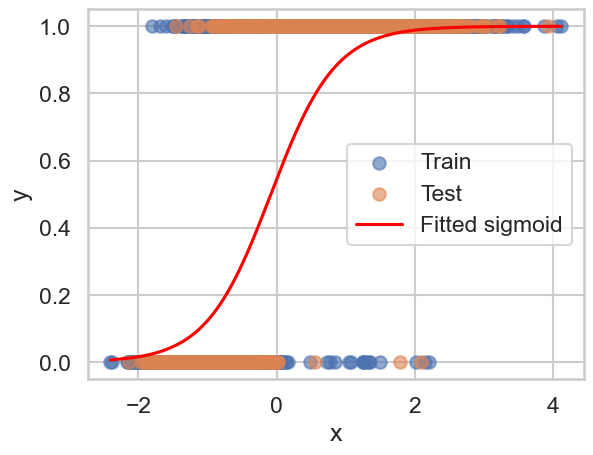

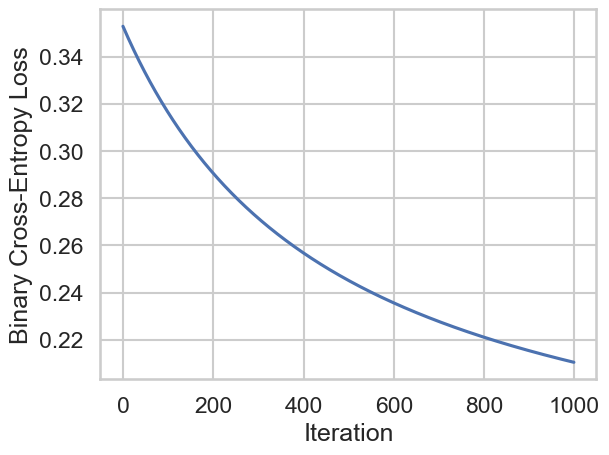

Accuracy (train): 0.948
Accuracy (test): 0.951


In [12]:
X, y = make_classification(n_samples=10000, n_features=1, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X = X.flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
w = np.random.randn()
b = np.random.randn()

# Gradient descent loop
losses = []
for iteration in range(num_iterations):
    y_pred = 1/(1+ np.exp(-(b + w * X_train)))
    loss = - np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred)) 
    losses.append(loss)

    # Gradients
    db = np.mean(y_pred - y_train)
    dw = np.mean((y_pred - y_train) * X_train)

    # Parameter updates
    b -= learning_rate * db
    w -= learning_rate * dw

# Final parameters
print("b:", b)
print("w:", w)

# Plot fitted line
plt.scatter(X_train, y_train, alpha=0.6, label='Train')
plt.scatter(X_test, y_test, alpha=0.6, label='Test')
plt.plot(np.sort(X), 1/(1+np.exp(-(b + w * np.sort(X)))), color='red', label='Fitted sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot convergence
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.show()

# Accuracy calculation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict on train and test set
y_train_pred = (1/(1+np.exp(-(b + w * X_train))) > 0.5).astype(int)
y_test_pred = (1/(1+np.exp(-(b + w * X_test))) > 0.5).astype(int)

acc_train = accuracy(y_train, y_train_pred)
acc_test = accuracy(y_test, y_test_pred)
print(f"Accuracy (train): {acc_train:.3f}")
print(f"Accuracy (test): {acc_test:.3f}")

# Exercise 1.2: Softmax regression (with log-sum-exp) from scratch

b shape: (3, 1)
W shape: (3, 2)
Final loss: 0.24779335898830326


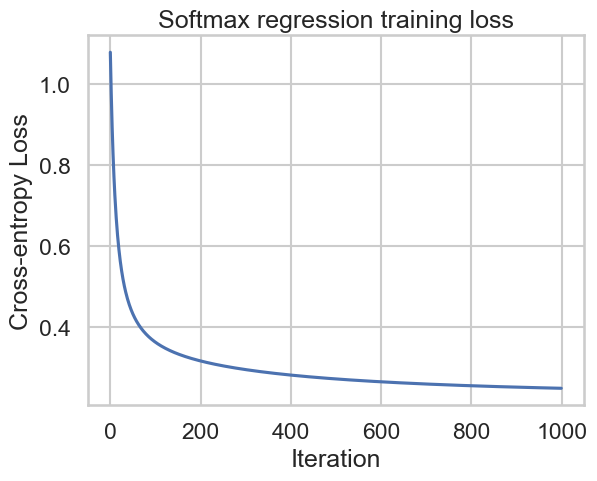

Accuracy (train): 0.926
Accuracy (test): 0.932


In [ ]:
# Generate data
X, y = make_classification(n_samples=10000, n_classes=3, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
#stratify=y to maintain class proportions (in this way train and test sets have similar class distributions, which is important for classification tasks)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

n_train, n_features = X_train.shape
n_classes = len(np.unique(y_train))

# One-hot encode training labels (shape: n_classes x n_train)
Y_train = np.zeros((n_classes, n_train))
Y_train[y_train, np.arange(n_train)] = 1

# Transpose training data for matrix operations (features x samples)
X_train_T = X_train.T

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Initialize parameters W (n_classes x n_features) and b (n_classes x 1)
rng = np.random.default_rng(42)
W = rng.normal(scale=0.01, size=(n_classes, n_features))
b = np.zeros((n_classes, 1))

# Gradient descent loop (vectorized)
losses = []
for iteration in range(num_iterations):
    # Linear scores: shape (n_classes, n_train)
    Z = W @ X_train_T + b

    # Numerically stable softmax: subtract max per column
    Z_max = np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z - Z_max)
    y_pred = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)  # shape (n_classes, n_train)

    # Cross-entropy loss using log-sum-exp trick
    log_sum_exp = Z_max + np.log(np.sum(exp_Z, axis=0, keepdims=True))  # shape (1, n_train)
    correct_class_scores = np.sum(Y_train * Z, axis=0, keepdims=True)  # shape (1, n_train)
    nll_per_sample = log_sum_exp - correct_class_scores  # shape (1, n_train)
    loss = np.mean(nll_per_sample)
    losses.append(loss)

    # Gradients: for cross-entropy with softmax, dZ = (y_pred - Y_train)
    dZ = (y_pred - Y_train) / n_train
    dW = dZ @ X_train  # (n_classes x n_train) @ (n_train x n_features) -> (n_classes x n_features)
    db = np.sum(dZ, axis=1, keepdims=True)  # (n_classes x 1)

    # Parameter updates
    W -= learning_rate * dW
    b -= learning_rate * db

# Final parameters
print("b shape:", b.shape)
print("W shape:", W.shape)
print("Final loss:", losses[-1])

# Plot convergence
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy Loss')
plt.title('Softmax regression training loss')
plt.show()

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def predict_classes(X_input):
    scores = W @ X_input.T + b
    return np.argmax(scores, axis=0)

train_preds = predict_classes(X_train)
test_preds = predict_classes(X_test)

print(f"Accuracy (train): {accuracy(y_train, train_preds):.3f}")
print(f"Accuracy (test): {accuracy(y_test, test_preds):.3f}")
